Importing necessary library

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

Loading the data set

In [5]:
df=pd.read_csv('Loan Prediction.csv')

Display the dataset

In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Data Set Info

In [71]:
df[df['House_Ownership'] == 'norent_noown'].value_counts()


Id      Income   Age  Experience  Married/Single  House_Ownership  Car_Ownership  Profession           CITY           STATE        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag
26      1797876  76   20          single          norent_noown     no             Mechanical_engineer  Erode[17]      Tamil_Nadu   11               14                 0            1
166441  1369359  22   19          single          norent_noown     yes            Politician           Malda          West_Bengal  9                12                 0            1
169461  2136279  37   17          single          norent_noown     no             Dentist              Malda          West_Bengal  5                10                 0            1
169459  4343535  26   15          married         norent_noown     no             Hotel_Manager        Amritsar       Punjab       11               14                 0            1
169334  335003   75   11          single          norent_noown     no             Economist    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [14]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


EDA

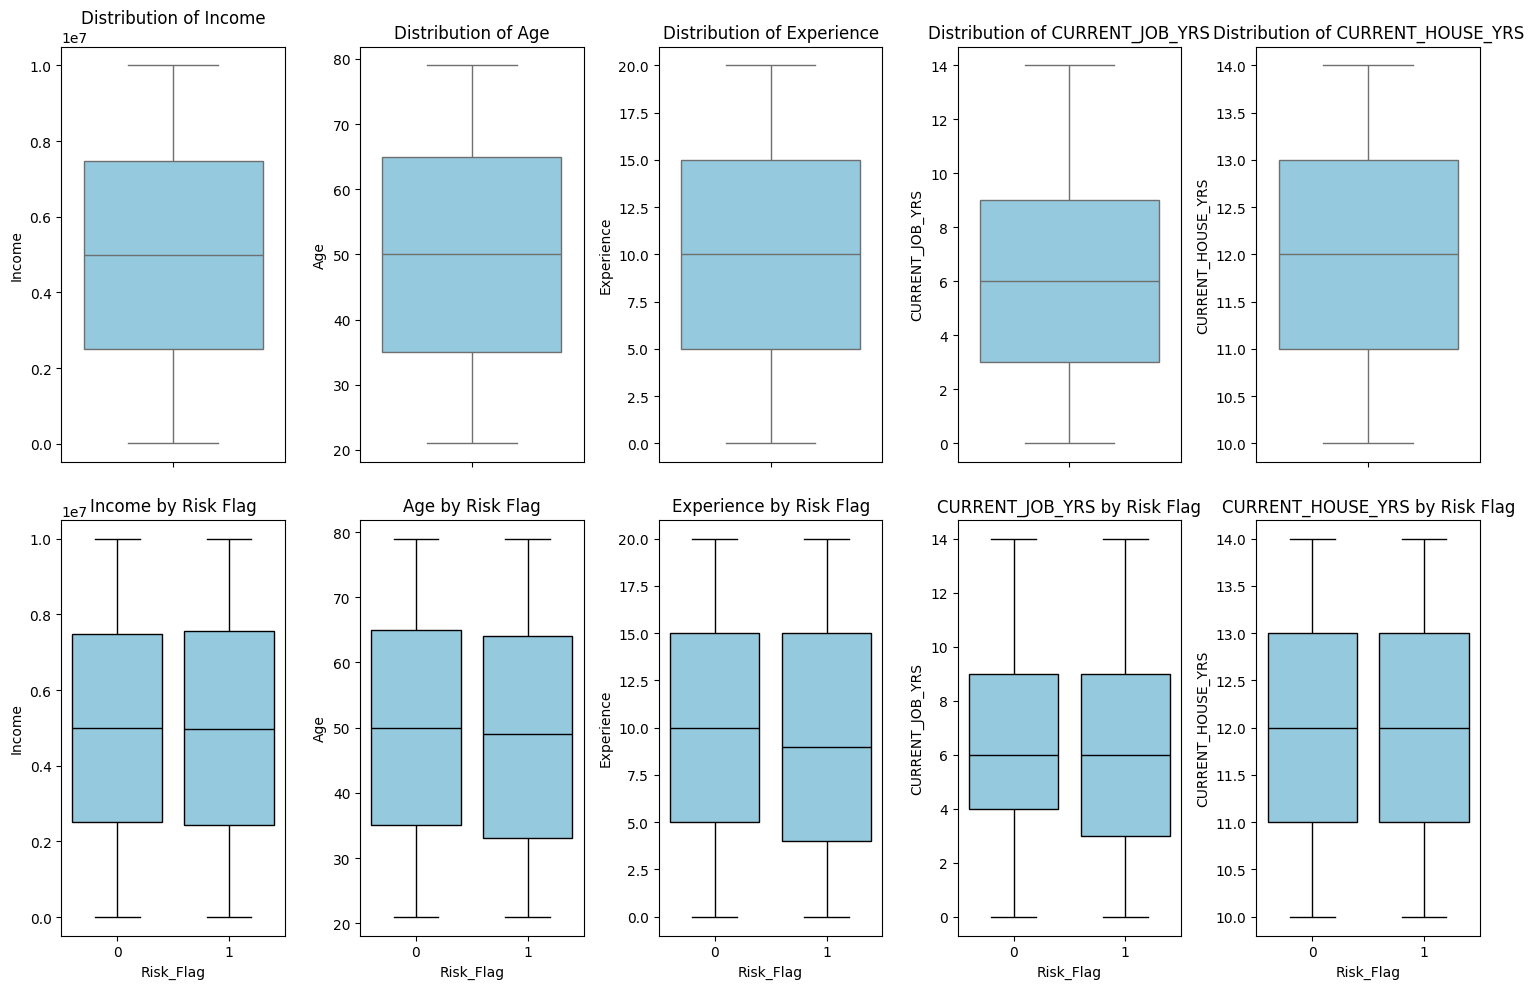

In [ ]:
numerical_columns = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]

# Create a figure with 2 rows: one for general boxplots, one for risk-based boxplots
plt.figure(figsize=(15, 10))

# First row: General boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=df, y=col, color="skyblue")
    plt.title(f"Distribution of {col}")

# Second row: Risk-based boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i+5)
    sns.boxplot(data=df, y=col, x='Risk_Flag', color="skyblue", linecolor='black', linewidth=1)
    plt.title(f"{col} by Risk Flag")

plt.tight_layout()
plt.show()

The Risk Flag box plot shows 2 boxes because it's displaying the distribution of values for two different categories in the 'Risk_Flag' column:

-Risk_Flag = 0: Represents customers who are not risky (good credit risk)

-Risk_Flag = 1: Represents customers who are risky (bad credit risk)

For example, in the Income by Risk Flag plot:

-The left box shows the income distribution for customers with Risk_Flag = 0 (low risk)

-The right box shows the income distribution for customers with Risk_Flag = 1 (high risk)


Below is the more refiened ploting of the figures 

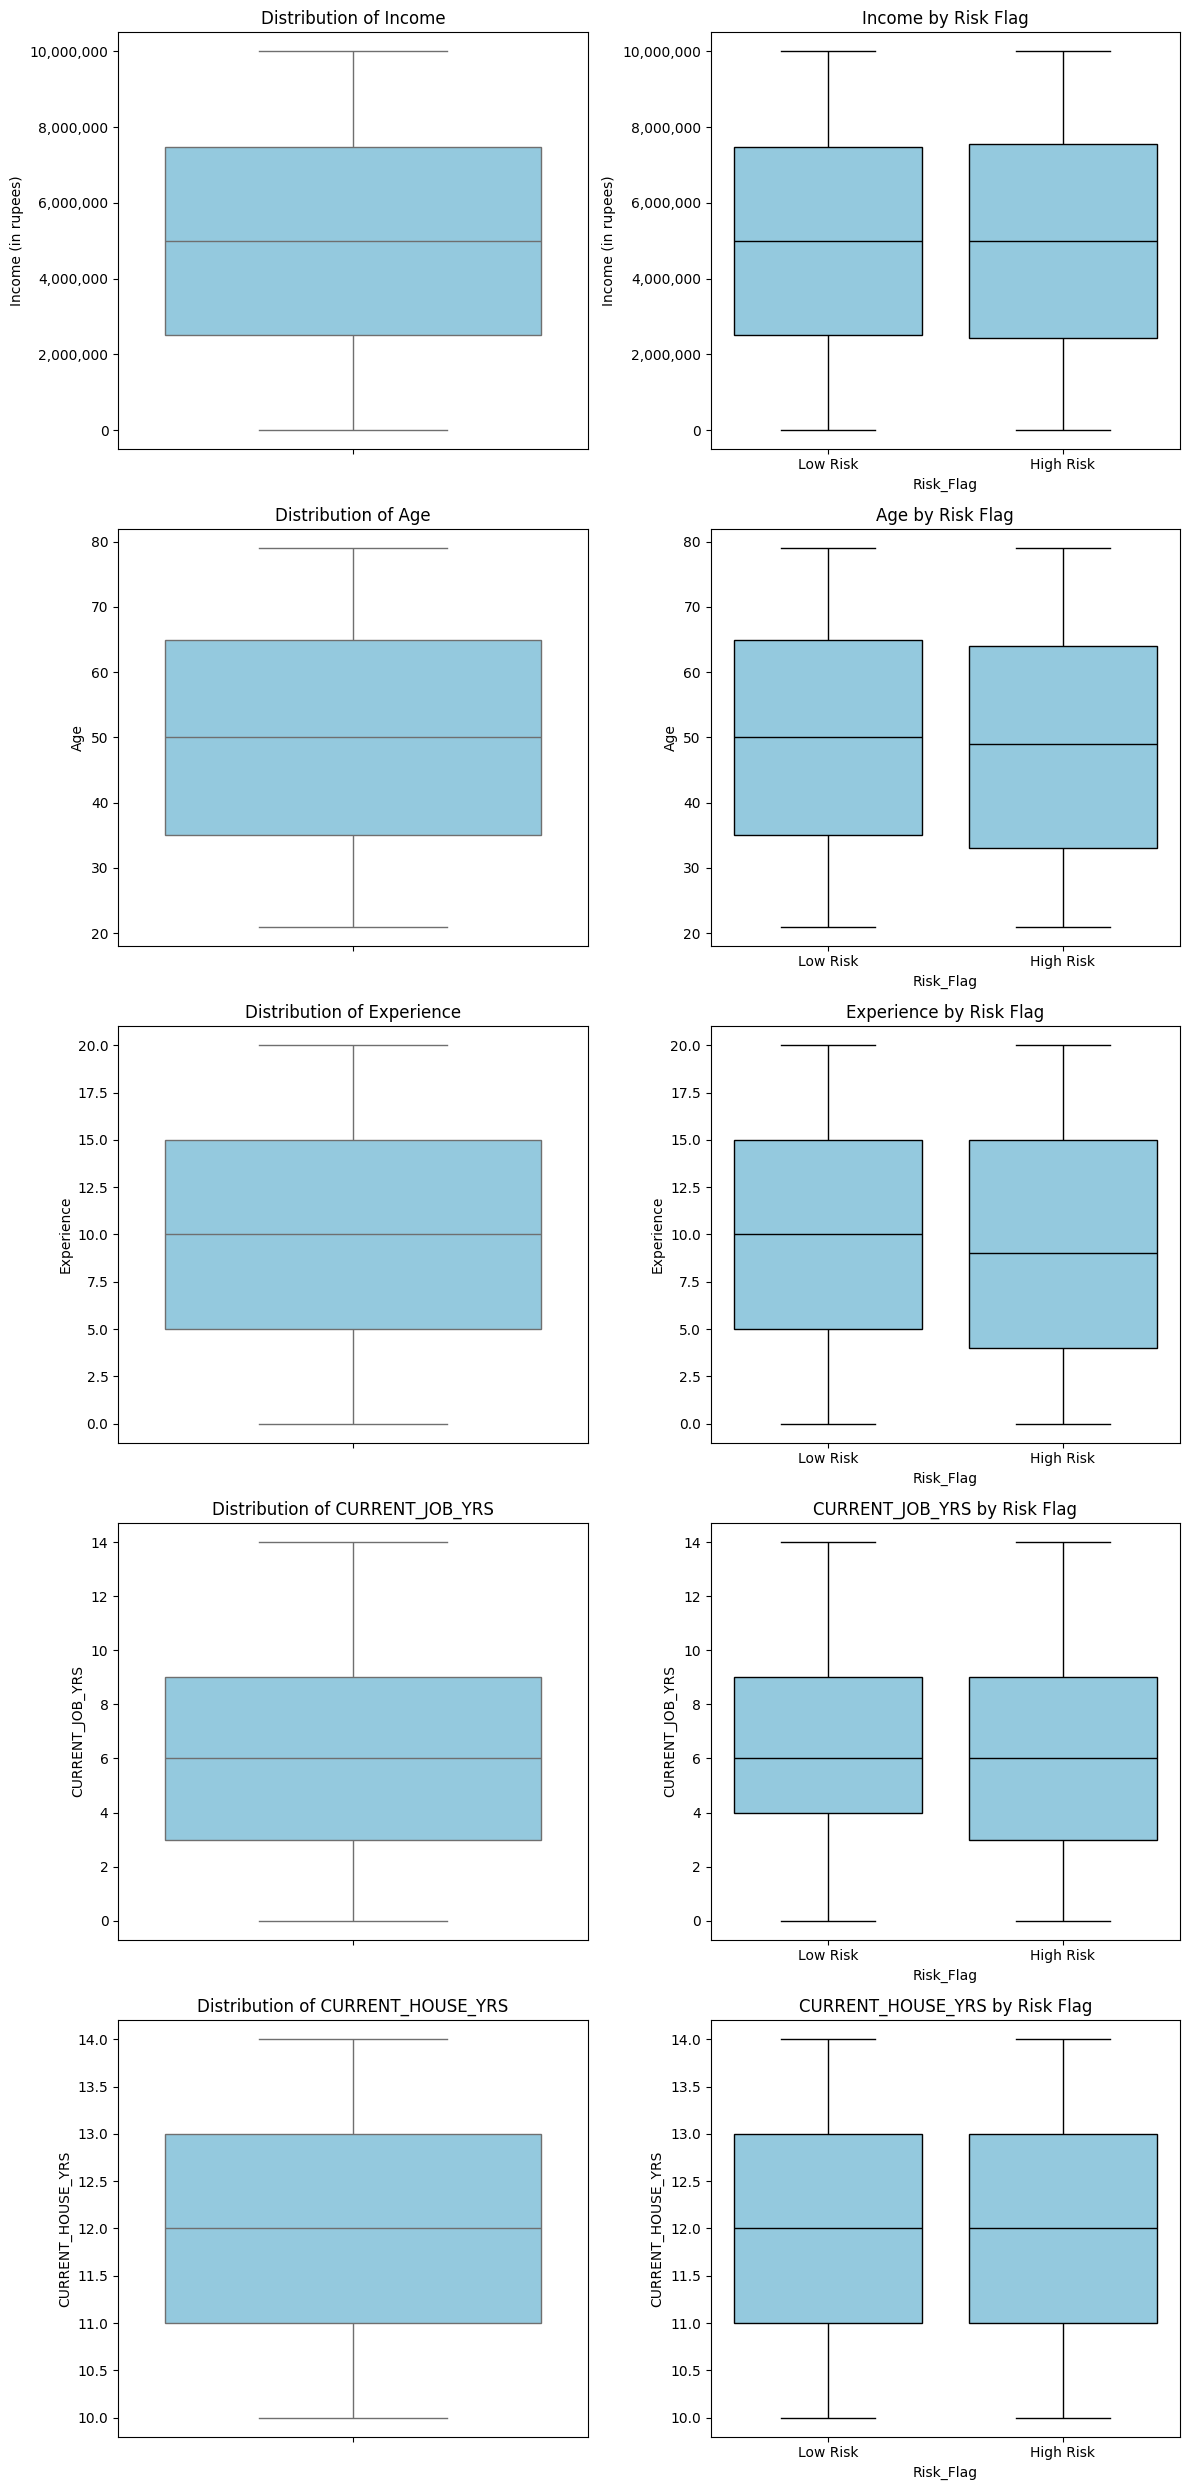

In [39]:
numerical_columns = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]

# Create a figure with 5 rows and 2 columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(numerical_columns):
    # Left plot: General distribution
    plt.subplot(5, 2, 2*i + 1)
    sns.boxplot(data=df, y=col, color="skyblue")
    plt.title(f"Distribution of {col}")
    
    if col == "Income":
        ax = plt.gca()
        ax.yaxis.set_major_formatter(lambda x, p: f'{int(x):,}')
        plt.ylabel("Income (in rupees)")
    
    # Right plot: Risk-based distribution
    plt.subplot(5, 2, 2*i + 2)
    sns.boxplot(data=df, y=col, x='Risk_Flag', color="skyblue", linecolor='black', linewidth=1)
    plt.title(f"{col} by Risk Flag")
    plt.xticks([0, 1], ['Low Risk', 'High Risk'])
    
    if col == "Income":
        ax = plt.gca()
        ax.yaxis.set_major_formatter(lambda x, p: f'{int(x):,}')
        plt.ylabel("Income (in rupees)")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

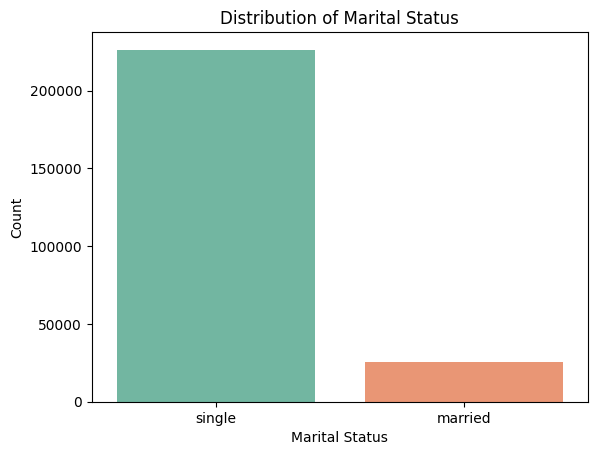

In [56]:
sns.countplot(data=df, 
              x='Married/Single', 
              hue='Married/Single',  # Add hue parameter
              palette='Set2',
              legend=False)  # Hide the legend since it's redundant
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

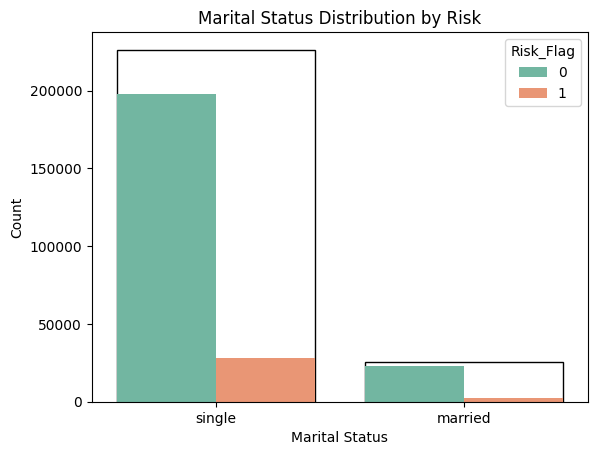

In [60]:
# Without hue - basic countplot
sns.countplot(data=df, x='Married/Single', color='white', edgecolor='black')

# With hue - showing distribution by Risk_Flag
sns.countplot(data=df, 
             x='Married/Single', 
             hue='Risk_Flag',
             palette='Set2')
plt.title('Marital Status Distribution by Risk')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [73]:
df['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

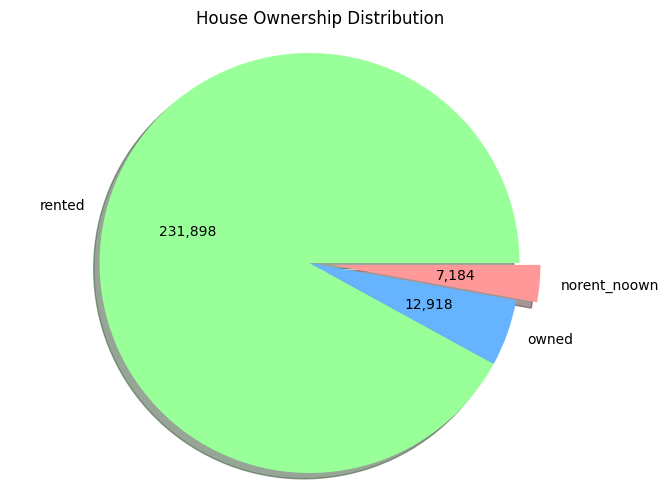

In [90]:
plt.figure(figsize=(8, 6), )
plt.pie(df['House_Ownership'].value_counts(),
        labels=df['House_Ownership'].value_counts().index,
        autopct=lambda pct: f'{int(pct*sum(df["House_Ownership"].value_counts())/100):,}',
        colors=['#99ff99','#66b3ff','#ff9999'],
        explode=(0, 0, 0.1),
        shadow=True,)
        #startangle=140)
plt.title('House Ownership Distribution')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

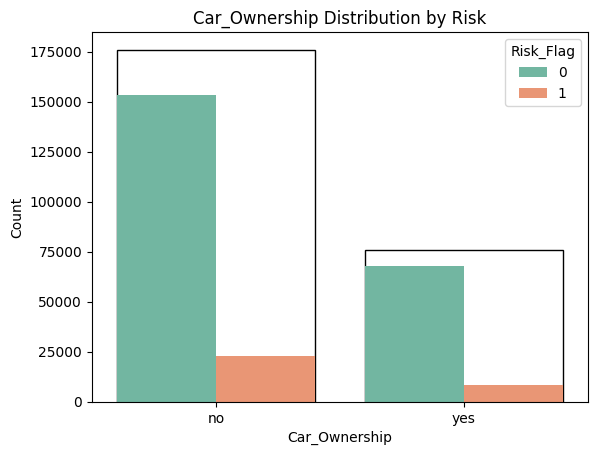

In [85]:
# Without hue - basic countplot
sns.countplot(data=df, x='Car_Ownership', color='white', edgecolor='black')

# With hue - showing distribution by Risk_Flag
sns.countplot(data=df, 
             x='Car_Ownership', 
             hue='Risk_Flag',
             palette='Set2')
plt.title('Car_Ownership Distribution by Risk')
plt.xlabel('Car_Ownership')
plt.ylabel('Count')

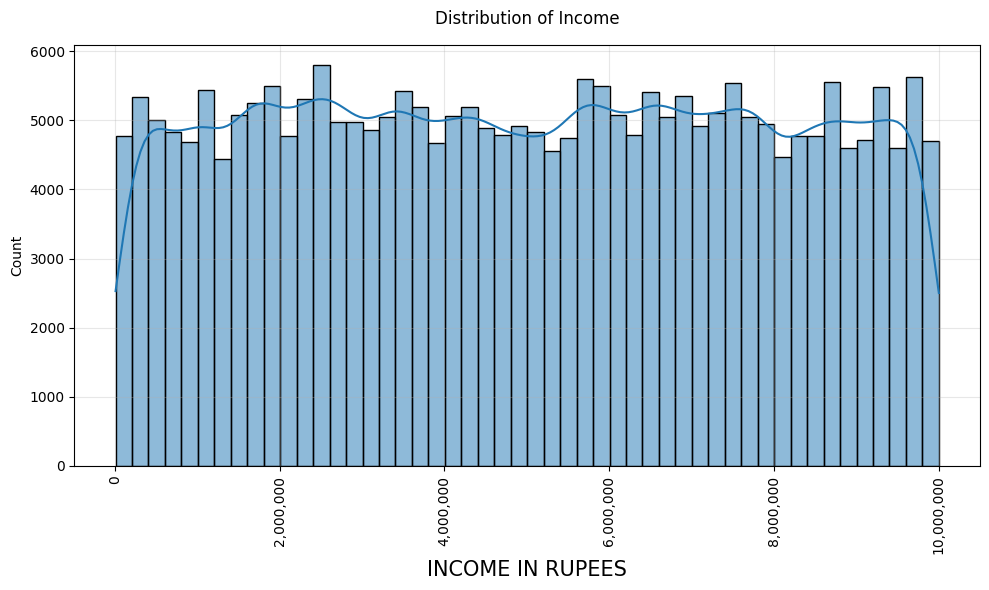

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', bins=50, kde=True)

# Format x-axis to show values in thousands
plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x):,}')

# Add proper labels and title
plt.title('Distribution of Income', fontsize=12, pad=15)
plt.xlabel('Income in rupees'.upper(), fontsize=15)
plt.ylabel('Count', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/hm/hvp732tn5lsc3vszfjzmh3280000gn/T/ipykernel_93508/2836601643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=profession_counts.index,


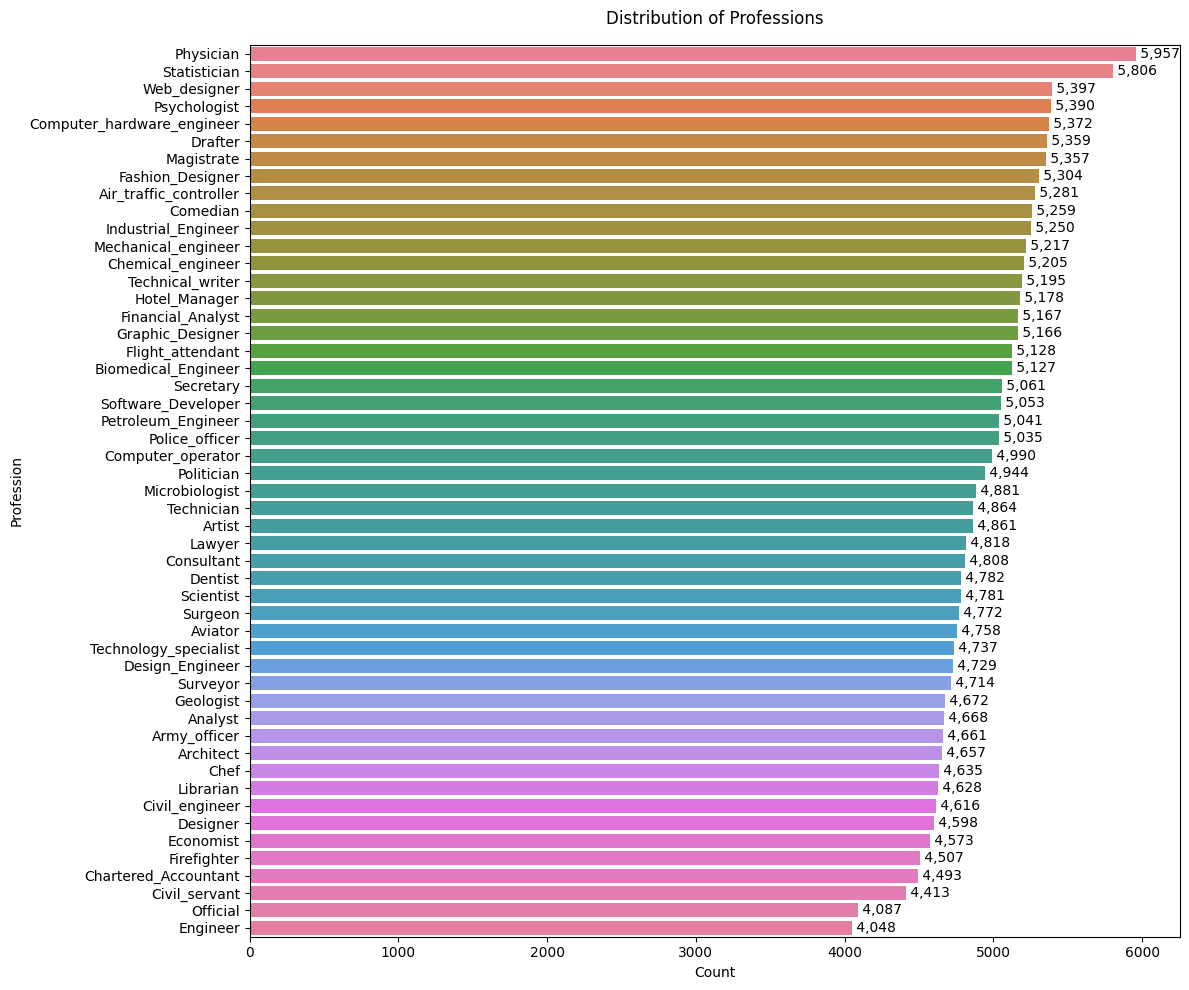

In [105]:
plt.figure(figsize=(12, 10))
# Sort values by count in descending order for better visualization
profession_counts = df['Profession'].value_counts()

# Create horizontal bar plot
sns.barplot(y=profession_counts.index, 
           x=profession_counts.values, 
           palette='husl')

# Add value labels to the end of each bar
for i, v in enumerate(profession_counts.values):
    plt.text(v, i, f' {v:,}', va='center')

plt.title('Distribution of Professions', fontsize=12, pad=15)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Profession', fontsize=10)
plt.tight_layout()
plt.show()

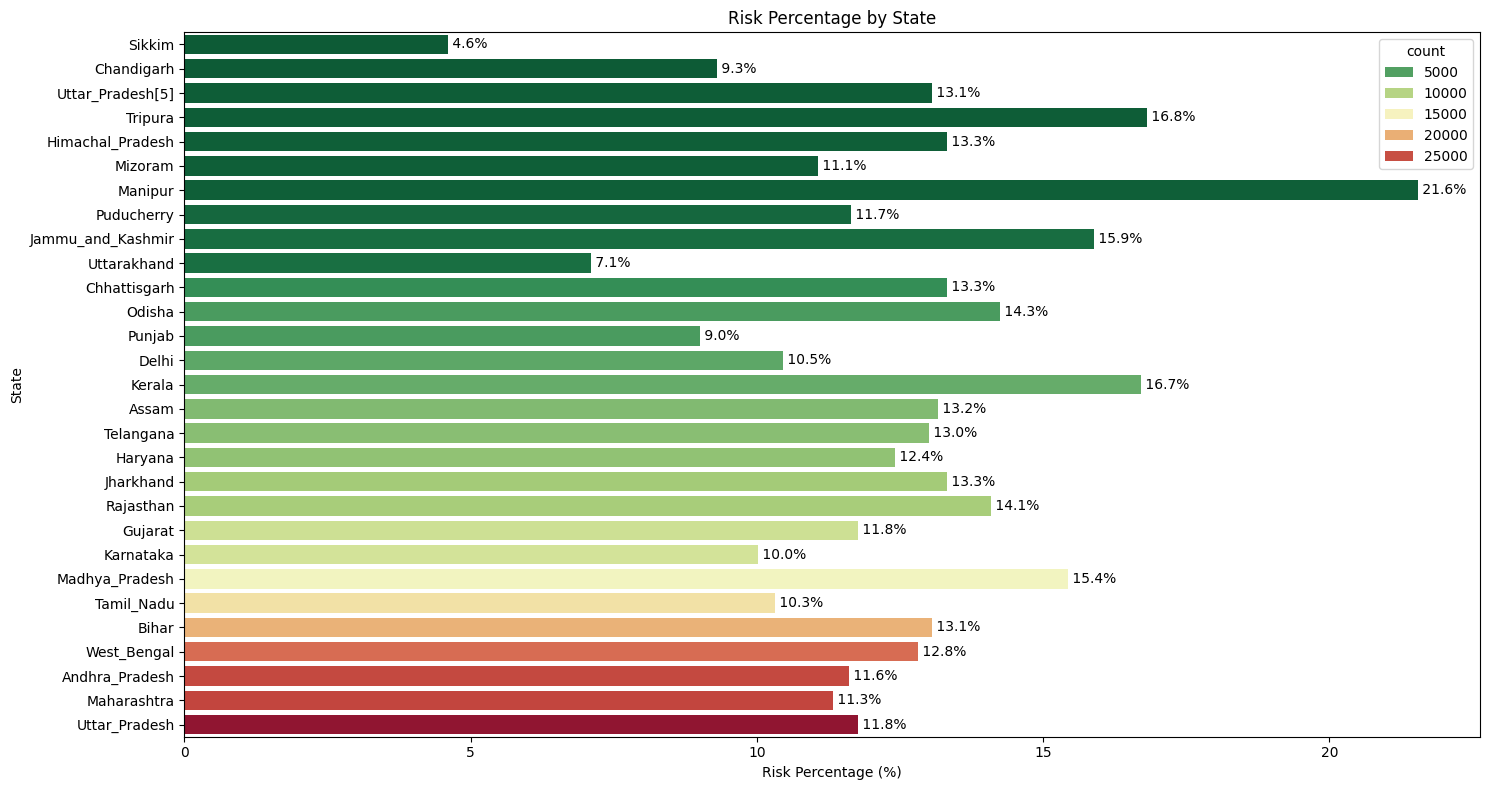

In [114]:
# Simple state-wise risk analysis without map
plt.figure(figsize=(15, 8))

state_analysis = df.groupby('STATE')['Risk_Flag'].agg(['count', 'mean'])
state_analysis = state_analysis.sort_values('count', ascending=True)

# Create horizontal bar plot
sns.barplot(y=state_analysis.index, 
           x=state_analysis['mean'] * 100,
           palette='RdYlGn_r',
           hue=state_analysis['count'])
plt.title('Risk Percentage by State')
plt.xlabel('Risk Percentage (%)')
plt.ylabel('State')

# Add value labels
for i, v in enumerate(state_analysis['mean']):
    plt.text(v * 100, i, f' {v*100:.1f}%', va='center')

plt.tight_layout()
plt.show()